<a href="https://colab.research.google.com/github/bharadwajkastur1/Brain-Tumor-Segmentation-and-Survival-Prediction/blob/main/IntDSFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import sklearn.metrics

In [3]:
pip install scikit-plot

In [4]:
import pandas as pd # For DataFrames, Series, and reading csv data in.
import seaborn as sns # Graphing, built ontop of MatPlot for ease-of-use and nicer diagrams.
import matplotlib.pyplot as plt # MatPlotLib for graphing data visually. Seaborn more likely to be used.
import numpy as np # For manipulating arrays and changing data into correct formats for certain libraries
import sklearn # For Machine Learning algorithms
import scikitplot # Confusion matrix plotting
from sklearn.decomposition import PCA # For PCA dimensionality reduction technique
from sklearn.preprocessing import StandardScaler # For scaling to unit scale, before PCA application
from sklearn.preprocessing import LabelBinarizer # For converting categorical data into numeric, for modeling stage
from sklearn.model_selection import StratifiedKFold # For optimal train_test splitting, for model input data
from sklearn.model_selection import train_test_split # For basic dataset splitting
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors ML classifier (default n. of neighbors = 5)
from scikitplot.metrics import plot_confusion_matrix # For plotting confusion matrices
from sklearn.metrics import accuracy_score # For getting the accuracy of a model's predictions
from sklearn.metrics import classification_report # Various metrics for model performance
from sklearn.neural_network import MLPClassifier # For Neural Network classifier
from sklearn.linear_model import LogisticRegression

In [ ]:
!wget https://github.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/blob/b32206309e060f27f4c101783b7efa6b26cfea15/Friday-WorkingHours-Afternoon-PortScan.zip?raw=true -O Friday-WorkingHours-Afternoon-PortScan.zip
!unzip -u Friday-WorkingHours-Afternoon-PortScan.zip
df1 = pd.read_csv('Friday-WorkingHours-Afternoon-PortScan.csv')
#df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

--2023-10-31 13:58:54--  https://github.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/blob/b32206309e060f27f4c101783b7efa6b26cfea15/Friday-WorkingHours-Afternoon-PortScan.zip?raw=true
Resolving github.com (github.com)... 20.29.134.23
Connecting to github.com (github.com)|20.29.134.23|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/raw/b32206309e060f27f4c101783b7efa6b26cfea15/Friday-WorkingHours-Afternoon-PortScan.zip [following]
--2023-10-31 13:58:54--  https://github.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/raw/b32206309e060f27f4c101783b7efa6b26cfea15/Friday-WorkingHours-Afternoon-PortScan.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/b32206309e060f27f4c101783b7efa6b26cfea15/Friday-WorkingHours-Afternoon-PortScan.zi

In [ ]:
!wget https://github.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/blob/b32206309e060f27f4c101783b7efa6b26cfea15/Friday-WorkingHours-Morning.zip?raw=true -O Friday-WorkingHours-Morning.zip
!unzip -u Friday-WorkingHours-Morning.zip
df2 = pd.read_csv('Friday-WorkingHours-Morning.csv')
#df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


--2023-10-31 13:58:58--  https://github.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/blob/b32206309e060f27f4c101783b7efa6b26cfea15/Friday-WorkingHours-Morning.zip?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/raw/b32206309e060f27f4c101783b7efa6b26cfea15/Friday-WorkingHours-Morning.zip [following]
--2023-10-31 13:58:58--  https://github.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/raw/b32206309e060f27f4c101783b7efa6b26cfea15/Friday-WorkingHours-Morning.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/b32206309e060f27f4c101783b7efa6b26cfea15/Friday-WorkingHours-Morning.zip [following]
--2023-10-31 13:58:58--  h

In [ ]:
!wget https://github.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/blob/174a7cae470ccfb842678836d044ef9d92d7b662/Friday-WorkingHours-Afternoon-DDos.zip?raw=true -O Friday-WorkingHours-Afternoon-DDos.zip
!unzip -u Friday-WorkingHours-Afternoon-DDos.zip
df3 = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.csv')
#df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

--2023-10-31 13:59:02--  https://github.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/blob/174a7cae470ccfb842678836d044ef9d92d7b662/Friday-WorkingHours-Afternoon-DDos.zip?raw=true
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/raw/174a7cae470ccfb842678836d044ef9d92d7b662/Friday-WorkingHours-Afternoon-DDos.zip [following]
--2023-10-31 13:59:02--  https://github.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/raw/174a7cae470ccfb842678836d044ef9d92d7b662/Friday-WorkingHours-Afternoon-DDos.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/174a7cae470ccfb842678836d044ef9d92d7b662/Friday-WorkingHours-Afternoon-DDos.zip [following

In [ ]:
!wget https://github.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/blob/130048991ba40eed7b04999714484a14d2c38ad3/Thursday-WorkingHours-Morning-WebAttacks.zip?raw=true -O Thursday-WorkingHours-Morning-WebAttacks.zip
!unzip -u Thursday-WorkingHours-Morning-WebAttacks.zip
df4 = pd.read_csv('Thursday-WorkingHours-Morning-WebAttacks.csv')

--2023-10-31 13:59:06--  https://github.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/blob/130048991ba40eed7b04999714484a14d2c38ad3/Thursday-WorkingHours-Morning-WebAttacks.zip?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/raw/130048991ba40eed7b04999714484a14d2c38ad3/Thursday-WorkingHours-Morning-WebAttacks.zip [following]
--2023-10-31 13:59:06--  https://github.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/raw/130048991ba40eed7b04999714484a14d2c38ad3/Thursday-WorkingHours-Morning-WebAttacks.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/130048991ba40eed7b04999714484a14d2c38ad3/Thursday-WorkingHours-Morning-W

In [ ]:
import re
df=pd.concat([df1,df2,df3,df4])
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('[^a-zA-Z0-9 \n\.]', '')


In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
print ('BENIGN types: ', len(df.loc[df['Label']=='BENIGN']))
print ('Fraction of BENIGN types:', float(len(df.loc[df['Label']=='BENIGN'])/df.shape[0]))

In [ ]:
"""df.replace('Infinity', -1, inplace=True)
df[["FlowBytes/s", "FlowPackets/s"]] = df[["FlowBytes/s", "FlowPackets/s"]].apply(pd.to_numeric)
df.replace([np.inf, -np.inf, np.nan], -1, inplace=True)"""

In [ ]:
df[df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [ ]:
indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
df = df[indices_to_keep]

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df['actdatapktfwd']

0          24
1          24
2           0
3          24
4           0
           ..
2827871     3
2827872     1
2827873     0
2827874     5
2827875     3
Name: actdatapktfwd, Length: 2827876, dtype: int64

In [ ]:
df['Label'].replace("Web.*", "WebAttack", regex=True, inplace=True)

In [ ]:
df_labels = np.unique(df['Label'].values).tolist()
df_no_labels = df.drop('Label', axis=1, inplace=False)
df_features = df_no_labels.columns.tolist()

print("Labels: ", df_labels)
print("Features: ", df_features)


In [ ]:
df['Label'].value_counts()

In [ ]:
df.describe()

In [5]:
df = pd.read_csv('cic_all_attack.csv')

In [6]:
resampled_df = pd.read_csv('balanced_cic.csv')

In [28]:
string_features = list(df.select_dtypes(include=['object']).columns)
string_features.remove('Label')
string_features

[]

<Axes: >

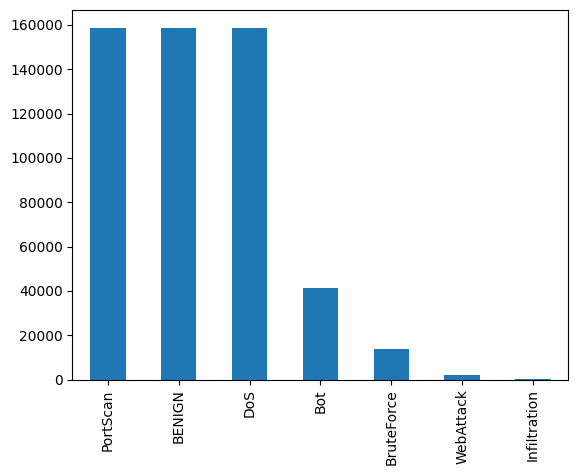

In [29]:
resampled_df['Label'].value_counts()[:20].plot(kind='bar')

<Axes: >

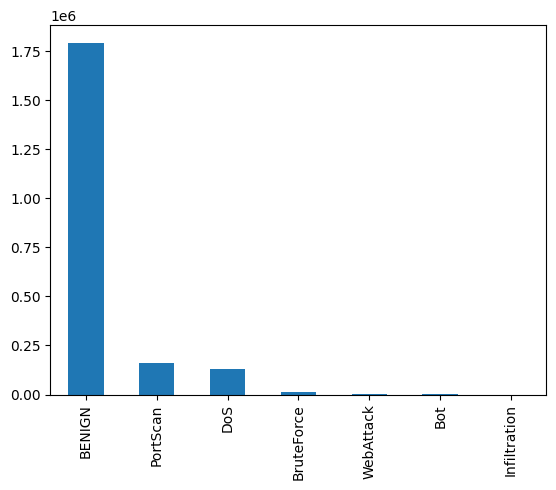

In [7]:
df['Label'].value_counts()[:20].plot(kind='bar')

In [ ]:
#df.replace(to_replace=['Bot','DDoS','PortScan','WebAttack'], value="ATTACK", inplace=True)

In [ ]:
benign_total = len(df[df['Label'] == "BENIGN"])
print("Benign: ", benign_total)
attack_total = len(df[df['Label'] != "BENIGN"])
print("Attack: ", attack_total)

Benign:  2271320
Attack:  556556


<Axes: >

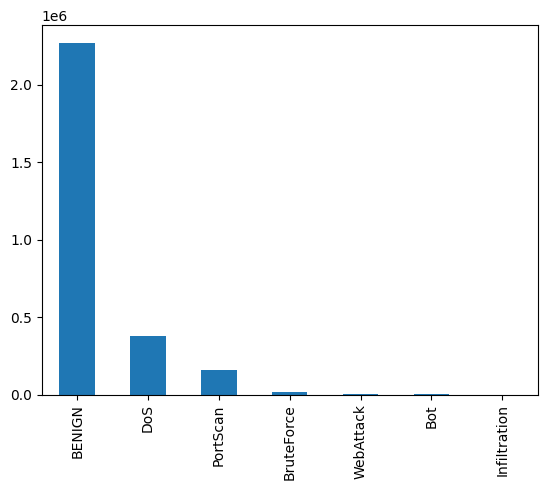

In [ ]:
df['Label'].value_counts()[:20].plot(kind='bar')

In [ ]:
len(df)

2827876

In [ ]:
df.Label.value_counts()

BENIGN          2271320
DoS              379748
PortScan         158804
BruteForce        13832
WebAttack          2180
Bot                1956
Infiltration         36
Name: Label, dtype: int64

In [ ]:
from sklearn.utils import resample
from collections import Counter


# Assuming you have a column 'label' in your DataFrame that contains class labels
label_column = 'Label'

# Identify the class distribution
class_distribution = Counter(df[label_column])

# Sort the classes by their counts in descending order
sorted_classes = [label for label, _ in sorted(class_distribution.items(), key=lambda x: x[1], reverse=True)]

# Identify the top two majority classes and the third majority class
majority_class_1, majority_class_2, third_majority_class = sorted_classes[:3]

# Calculate the size of the third majority class
desired_third_majority_size = class_distribution[third_majority_class]

# Initialize an empty DataFrame for the downsampled data
downsampled_data = pd.DataFrame(columns=df.columns)

# Downsample the top two majority classes to match the size of the third majority class
for majority_class in [majority_class_1, majority_class_2]:
    class_data = df[df[label_column] == majority_class]
    num_samples = desired_third_majority_size - class_distribution[majority_class]
    downsampled_class = resample(class_data, n_samples=num_samples, replace=False, random_state=42)
    downsampled_data = pd.concat([downsampled_data, downsampled_class])

# Combine the downsampled data with the data from the other classes
balanced_data = pd.concat([df[df[label_column] == third_majority_class], downsampled_data])

# Verify the new class distribution
new_class_distribution = Counter(balanced_data[label_column])
print(new_class_distribution)

Counter({'PortScan': 158804, 'BENIGN': 158804, 'DoS': 158804})


In [14]:
df.Label.value_counts()

PortScan        158804
BENIGN          158804
DoS             158804
Bot              41365
BruteForce       13832
WebAttack         2180
Infiltration        36
Name: Label, dtype: int64

In [31]:
resampled_df.Label.value_counts()

PortScan        158804
BENIGN          158804
DoS             158804
Bot              41365
BruteForce       13832
WebAttack         2180
Infiltration        36
Name: Label, dtype: int64

In [ ]:
label_column = 'Label'
# List of class labels to drop
classes_to_drop = ['PortScan', 'BENIGN','DoS']  # Replace with the labels you want to drop
# Create a new DataFrame without the specified class labels
df = df[~df[label_column].isin(classes_to_drop)]

In [ ]:
df = pd.concat([df, balanced_data], ignore_index=True)

In [ ]:
df.Label.value_counts()

PortScan        158804
BENIGN          158804
DoS             158804
BruteForce       13832
WebAttack         2180
Bot               1956
Infiltration        36
Name: Label, dtype: int64

In [32]:
resampled_df = resampled_df.dropna()

In [33]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Sample DataFrame (replace this with your own data)
data = resampled_df.copy()

# Assuming you have a column 'label' in your DataFrame that contains class labels
label_column = 'Label'

# Split the data into features and labels
X = data.drop(label_column, axis=1)
y = data[label_column]

# Identify the class distribution
class_distribution = Counter(y)

# Find the majority class (the class with the highest count)
majority_class = max(class_distribution, key=class_distribution.get)

# Calculate the desired size for the minority classes (to match the majority class)
desired_size = class_distribution[majority_class]

# Initialize SMOTE with the desired sampling strategy
smote = SMOTE(sampling_strategy={c: desired_size for c in class_distribution if c != majority_class}, random_state=42)

# Apply SMOTE to generate synthetic samples for the minority classes
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a DataFrame from the resampled data
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name=label_column)], axis=1)

# Verify the new class distribution
new_class_distribution = Counter(y_resampled)
print(new_class_distribution)

Counter({'Bot': 158804, 'WebAttack': 158804, 'Infiltration': 158804, 'BruteForce': 158804, 'PortScan': 158804, 'BENIGN': 158804, 'DoS': 158804})


In [35]:
resampled_data.Label.value_counts()

Bot             158804
WebAttack       158804
Infiltration    158804
BruteForce      158804
PortScan        158804
BENIGN          158804
DoS             158804
Name: Label, dtype: int64

In [34]:
resampled_data.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,minsegsizeforward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,8080,60202640.0,9.0,9.0,322.0,256.0,322.0,0.0,35.777778,107.333333,...,32.0,63678.2,22252.53596,103175.0,50911.0,10200000.0,34941.27201,10200000.0,10100000.0,Bot
1,8080,57891.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,32.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,Bot
2,8080,134812.0,4.0,3.0,206.0,134.0,194.0,0.0,51.500000,95.042096,...,20.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,Bot
3,1841,84.0,1.0,1.0,6.0,6.0,6.0,6.0,6.000000,0.000000,...,20.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,Bot
4,8080,127781.0,4.0,3.0,206.0,134.0,194.0,0.0,51.500000,95.042096,...,20.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,Bot


In [ ]:
"""import pandas as pd
from collections import Counter
from sklearn.utils import resample


# Identify the class distribution
class_distribution = Counter(df['Label'])  # Replace 'label_column' with your actual label column name

# Sort the class counts in descending order
sorted_class_counts = sorted(class_distribution.items(), key=lambda x: x[1], reverse=True)

# Find the second-highest count
second_highest_count = sorted_class_counts[1][1] if len(sorted_class_counts) > 1 else 0

# Identify the majority class
majority_class = max(class_distribution, key=class_distribution.get)

# Downsample the majority class to the second-highest count
majority_class_data = df[df['Label'] == majority_class]
downsampled_majority_class_data = resample(
    majority_class_data,
    n_samples=second_highest_count,
    replace=False,  # Set to False for undersampling
    random_state=42
)

# Create a new DataFrame with balanced class distribution
df = pd.concat([downsampled_majority_class_data] + [df[df['Label'] == label] for label, count in sorted_class_counts if label != majority_class])

# Verify the new class distribution
new_class_distribution = Counter(df['Label'])
print(new_class_distribution)"""

Counter({'BENIGN': 379748, 'DoS': 379748, 'PortScan': 158804, 'BruteForce': 13832, 'WebAttack': 2180, 'Bot': 1956, 'Infiltration': 36})


In [ ]:
df.Label.value_counts()

BENIGN          379748
DoS             379748
PortScan        158804
BruteForce       13832
WebAttack         2180
Bot               1956
Infiltration        36
Name: Label, dtype: int64

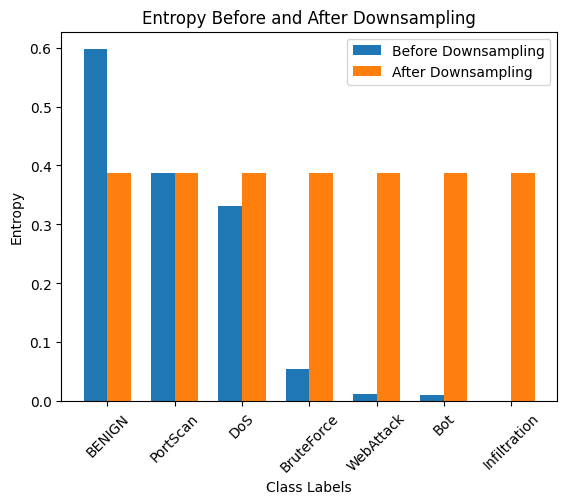

In [36]:
from scipy.stats import entropy

label_column = 'Label'

# Calculate entropy for each class before downsampling
class_distribution_before = df[label_column].value_counts()
total_samples_before = len(df)
entropy_before = []

for class_label in class_distribution_before.index:
    class_count = class_distribution_before[class_label]
    class_probability = class_count / total_samples_before
    entropy_class = entropy([class_probability, 1 - class_probability], base=2)
    entropy_before.append(entropy_class)

# Perform downsampling (as shown in a previous response)

# Assuming you have your downsampled data in the 'balanced_data' DataFrame
# Calculate entropy for each class after downsampling
class_distribution_after = resampled_data[label_column].value_counts()
total_samples_after = len(df)
entropy_after = []

for class_label in class_distribution_after.index:
    class_count = class_distribution_after[class_label]
    class_probability = class_count / total_samples_after
    entropy_class = entropy([class_probability, 1 - class_probability], base=2)
    entropy_after.append(entropy_class)

class_labels = class_distribution_before.index
x = np.arange(len(class_labels))
width = 0.35

fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, entropy_before, width, label='Before Downsampling')
bar2 = ax.bar(x + width/2, entropy_after, width, label='After Downsampling')

ax.set_xlabel('Class Labels')
ax.set_ylabel('Entropy')
ax.set_title('Entropy Before and After Downsampling')
ax.set_xticks(x)
ax.set_xticklabels(class_labels)
ax.legend()

plt.xticks(rotation=45)
plt.show()

In [ ]:
"""import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter

# Identify the class distribution
class_distribution = Counter(df['Label'])  # Replace 'label_column' with your actual label column name
majority_class = max(class_distribution, key=class_distribution.get)

# Separate minority and majority classes
minority_classes = [label for label in class_distribution if label != majority_class]

# Apply SMOTE to upsample all minority classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(df.drop('Label', axis=1), df['Label'])

# Combine the resampled data with the majority class
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=df.drop('Label', axis=1).columns), pd.Series(y_resampled, name='Label')], axis=1)

# Verify the new class distribution
new_class_distribution = Counter(resampled_data['Label'])
print(new_class_distribution)"""

Counter({'BENIGN': 379748, 'DoS': 379748, 'PortScan': 379748, 'BruteForce': 379748, 'WebAttack': 379748, 'Bot': 379748, 'Infiltration': 379748})


In [ ]:
balanced_data.Label.value_counts()

BENIGN          2271320
Infiltration    2271284
Bot             2269364
WebAttack       2269140
BruteForce      2257488
PortScan        2112516
DoS             1891572
Name: Label, dtype: int64

In [ ]:
resampled_data.Label.value_counts()

BENIGN          379748
DoS             379748
PortScan        379748
BruteForce      379748
WebAttack       379748
Bot             379748
Infiltration    379748
Name: Label, dtype: int64

In [38]:
resampled_data.to_csv('cic_balanced_all.csv', index = False)

In [39]:
df = resampled_data.copy()

In [40]:
df.Label.value_counts()

Bot             158804
WebAttack       158804
Infiltration    158804
BruteForce      158804
PortScan        158804
BENIGN          158804
DoS             158804
Name: Label, dtype: int64

<Axes: >

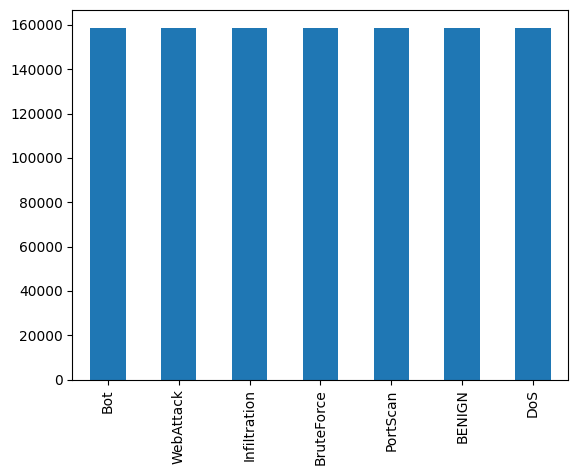

In [41]:
df['Label'].value_counts()[:20].plot(kind='bar')

In [ ]:
df.replace(to_replace=['Bot','DDoS','PortScan','WebAttack'], value="ATTACK", inplace=True)

<Axes: >

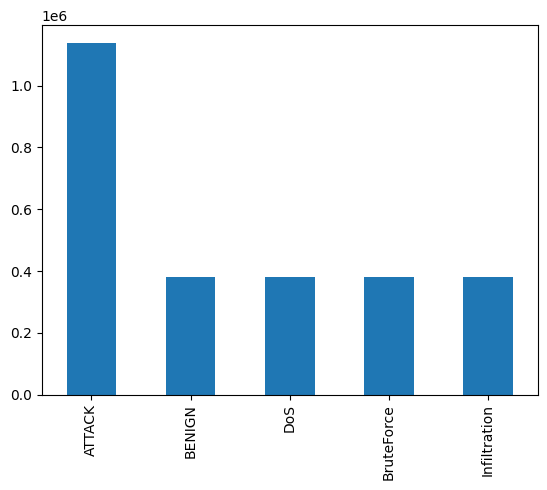

In [ ]:
df['Label'].value_counts()[:20].plot(kind='bar')

In [42]:
#drop the constant columns (which varience is 0)

variances = df.var(numeric_only=True)
constant_columns = variances[variances == 0].index
df = df.drop(constant_columns, axis=1)

print(constant_columns)
print (df.shape)


Index(['BwdPSHFlags', 'BwdURGFlags', 'FwdAvgBytesBulk', 'FwdAvgPacketsBulk',
       'FwdAvgBulkRate', 'BwdAvgBytesBulk', 'BwdAvgPacketsBulk',
       'BwdAvgBulkRate'],
      dtype='object')
(1111628, 71)


In [43]:
#drop duplicate columns

duplicates = set()
for i in range(0, len(df.columns)):
    col1 = df.columns[i]
    for j in range(i+1, len(df.columns)):
        col2 = df.columns[j]
        if(df[col1].equals(df[col2])):

            duplicates.add(col2)

print (duplicates)
df.drop(duplicates, axis=1, inplace=True)
print (df.shape)

{'SubflowFwdPackets', 'SYNFlagCount', 'AvgFwdSegmentSize', 'SubflowBwdPackets', 'ECEFlagCount', 'FwdHeaderLength.1', 'CWEFlagCount', 'SubflowFwdBytes'}
(1111628, 63)


In [ ]:
df['Label'] = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

In [ ]:
df['Label'].value_counts()

In [ ]:
df.head()

<Axes: >

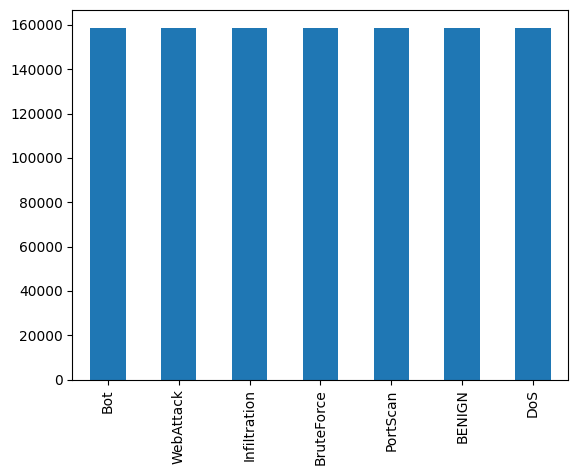

In [44]:
df['Label'].value_counts()[:20].plot(kind='bar')

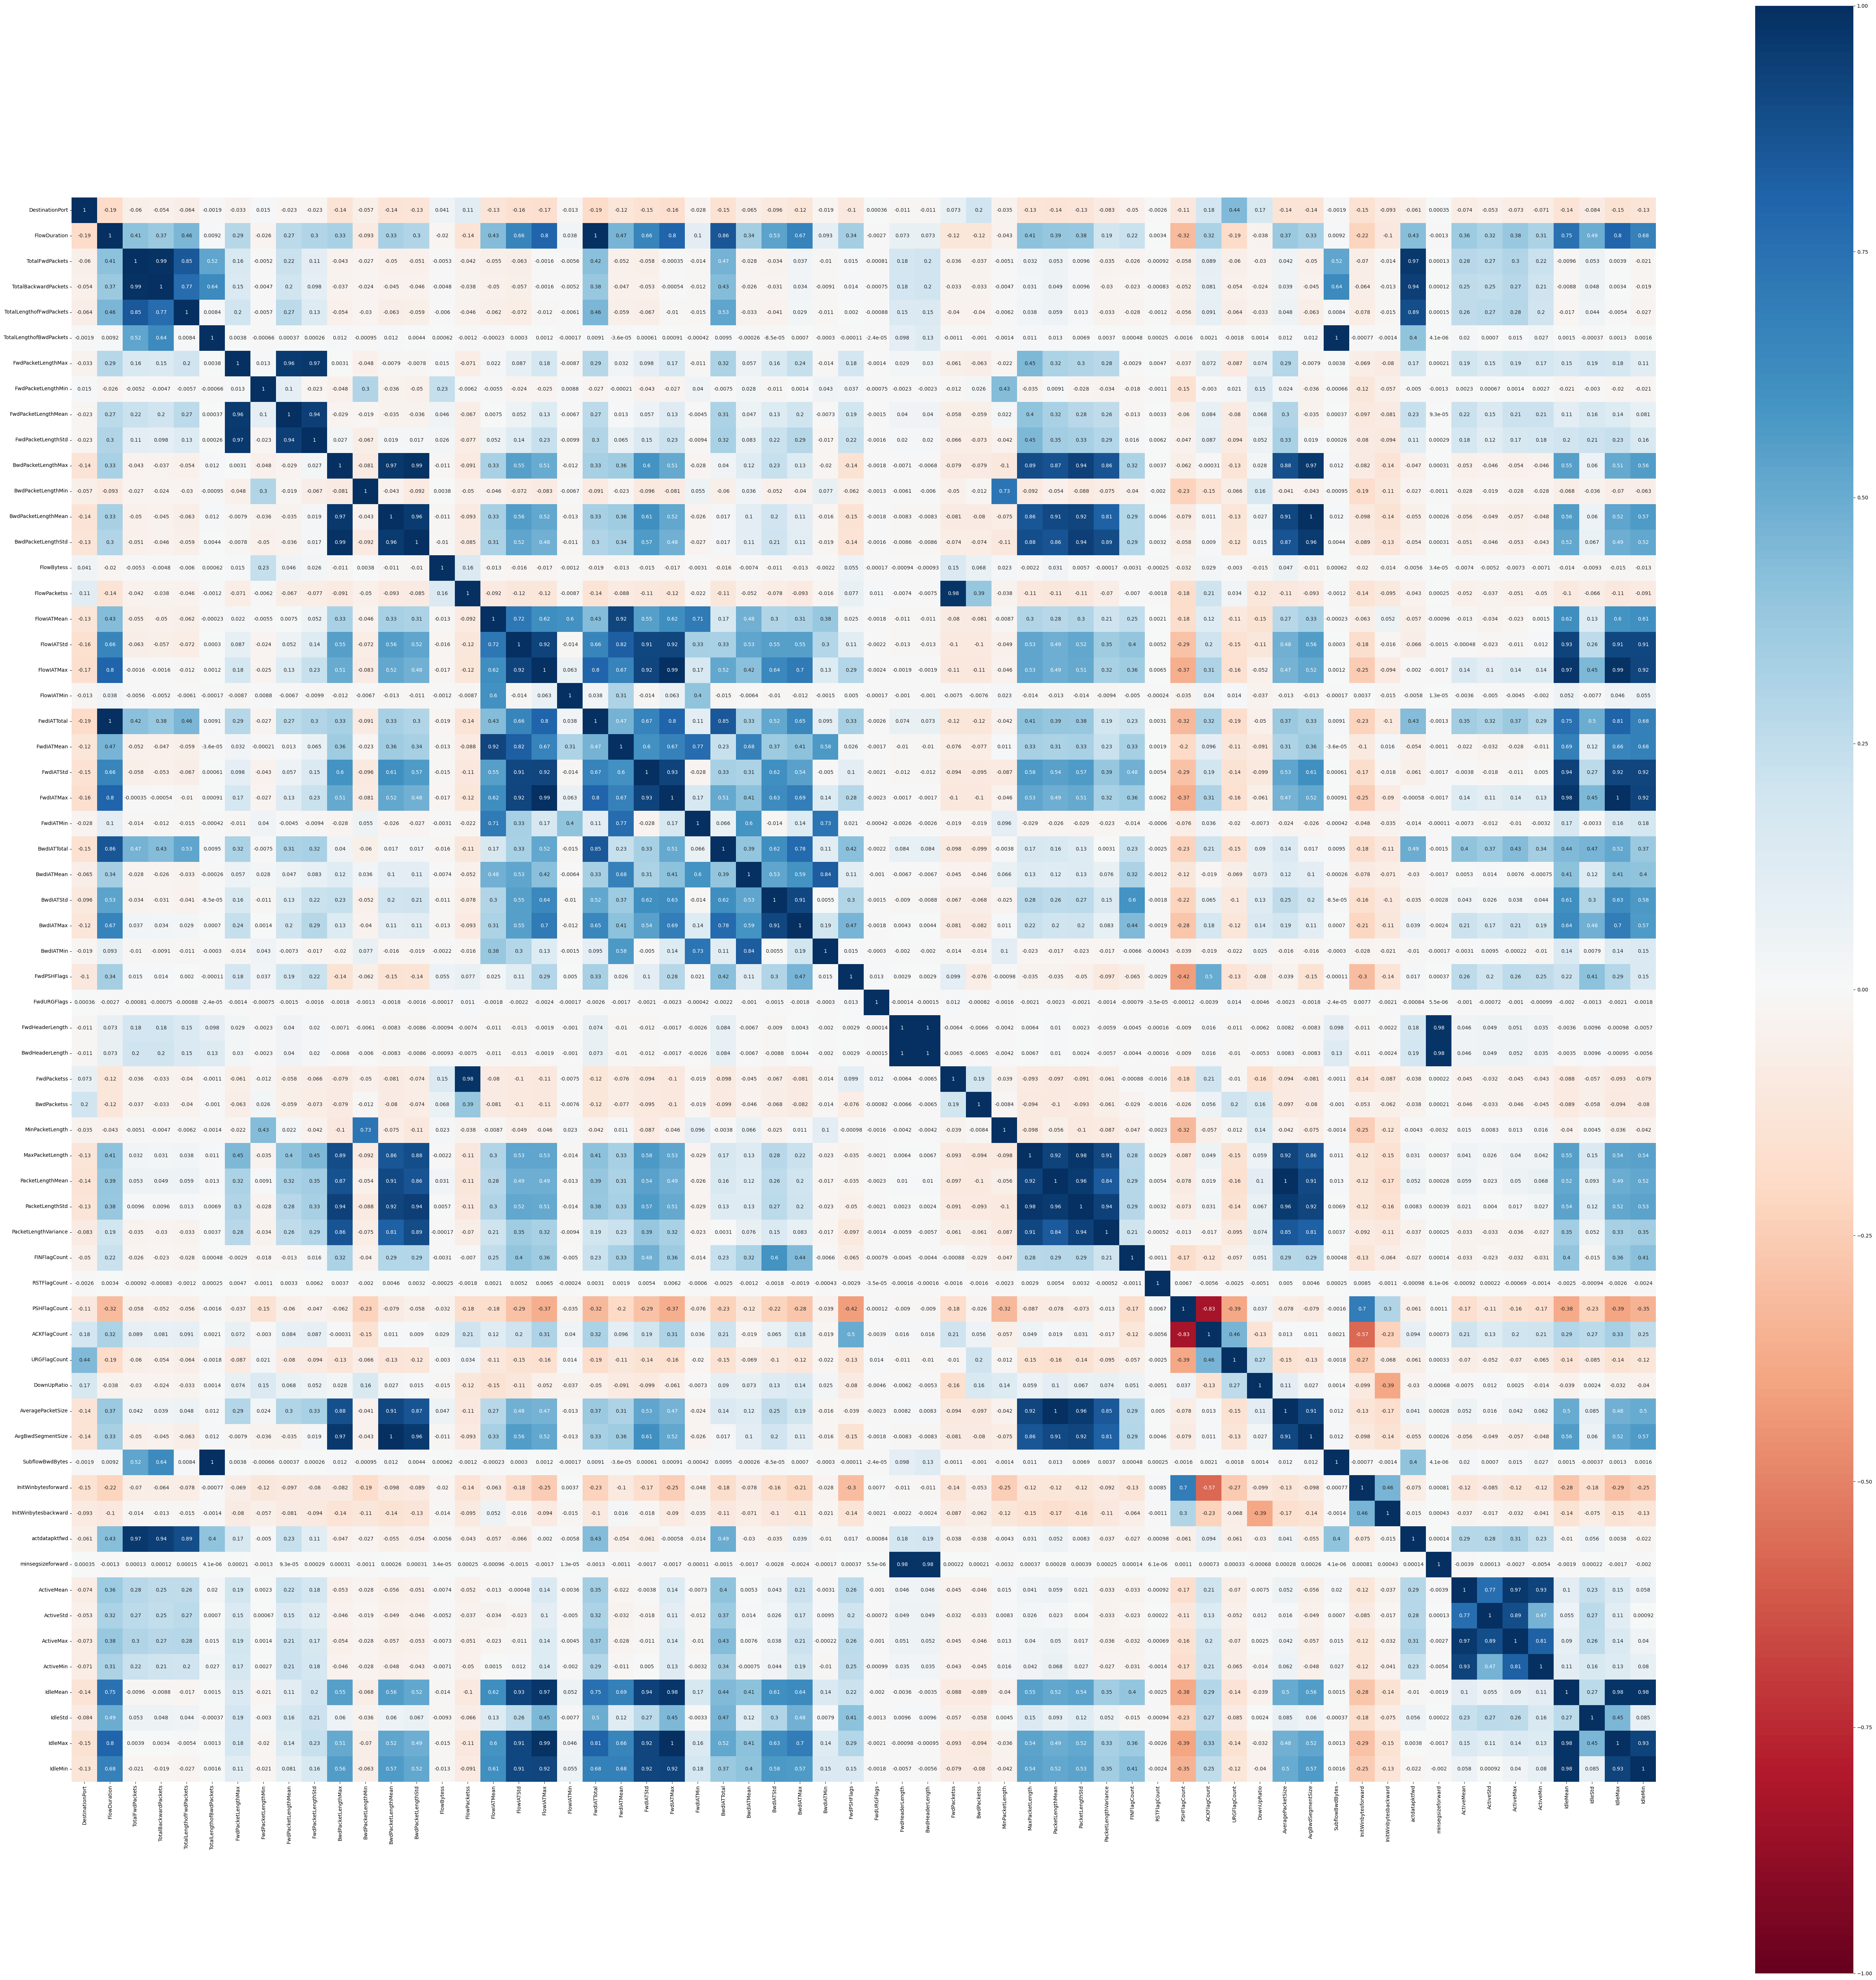

In [45]:
# pearson correlation heatmap
plt.figure(figsize=(70, 70))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, square=True) # annot=True
plt.show()

In [46]:
correlated_col = set()
is_correlated = [True] * len(corr.columns)
threshold = 0.70
for i in range (len(corr.columns)):
    if(is_correlated[i]):
        for j in range(i):
          if (corr.iloc[i, j] >= threshold) and (is_correlated[j]):
            colname = corr.columns[j]
            is_correlated[j]=False
            correlated_col.add(colname)

print(correlated_col)
print(len(correlated_col))

{'ActiveMean', 'TotalLengthofFwdPackets', 'FwdPacketLengthMax', 'BwdPacketLengthMean', 'IdleMax', 'FwdIATTotal', 'TotalBackwardPackets', 'FlowDuration', 'BwdPacketLengthStd', 'BwdPacketLengthMax', 'FwdIATStd', 'BwdIATTotal', 'AveragePacketSize', 'TotalFwdPackets', 'FlowIATMean', 'BwdIATStd', 'ActiveMax', 'FwdPacketLengthMean', 'FlowIATStd', 'PacketLengthMean', 'FwdIATMean', 'PacketLengthVariance', 'FwdIATMax', 'BwdHeaderLength', 'FlowPacketss', 'ActiveStd', 'MaxPacketLength', 'IdleMean', 'BwdIATMean', 'BwdPacketLengthMin', 'FwdHeaderLength', 'PacketLengthStd', 'TotalLengthofBwdPackets', 'FlowIATMax', 'FwdIATMin'}
35


In [47]:
df.drop(correlated_col, axis=1, inplace=True)
print (df.shape)

(1111628, 28)


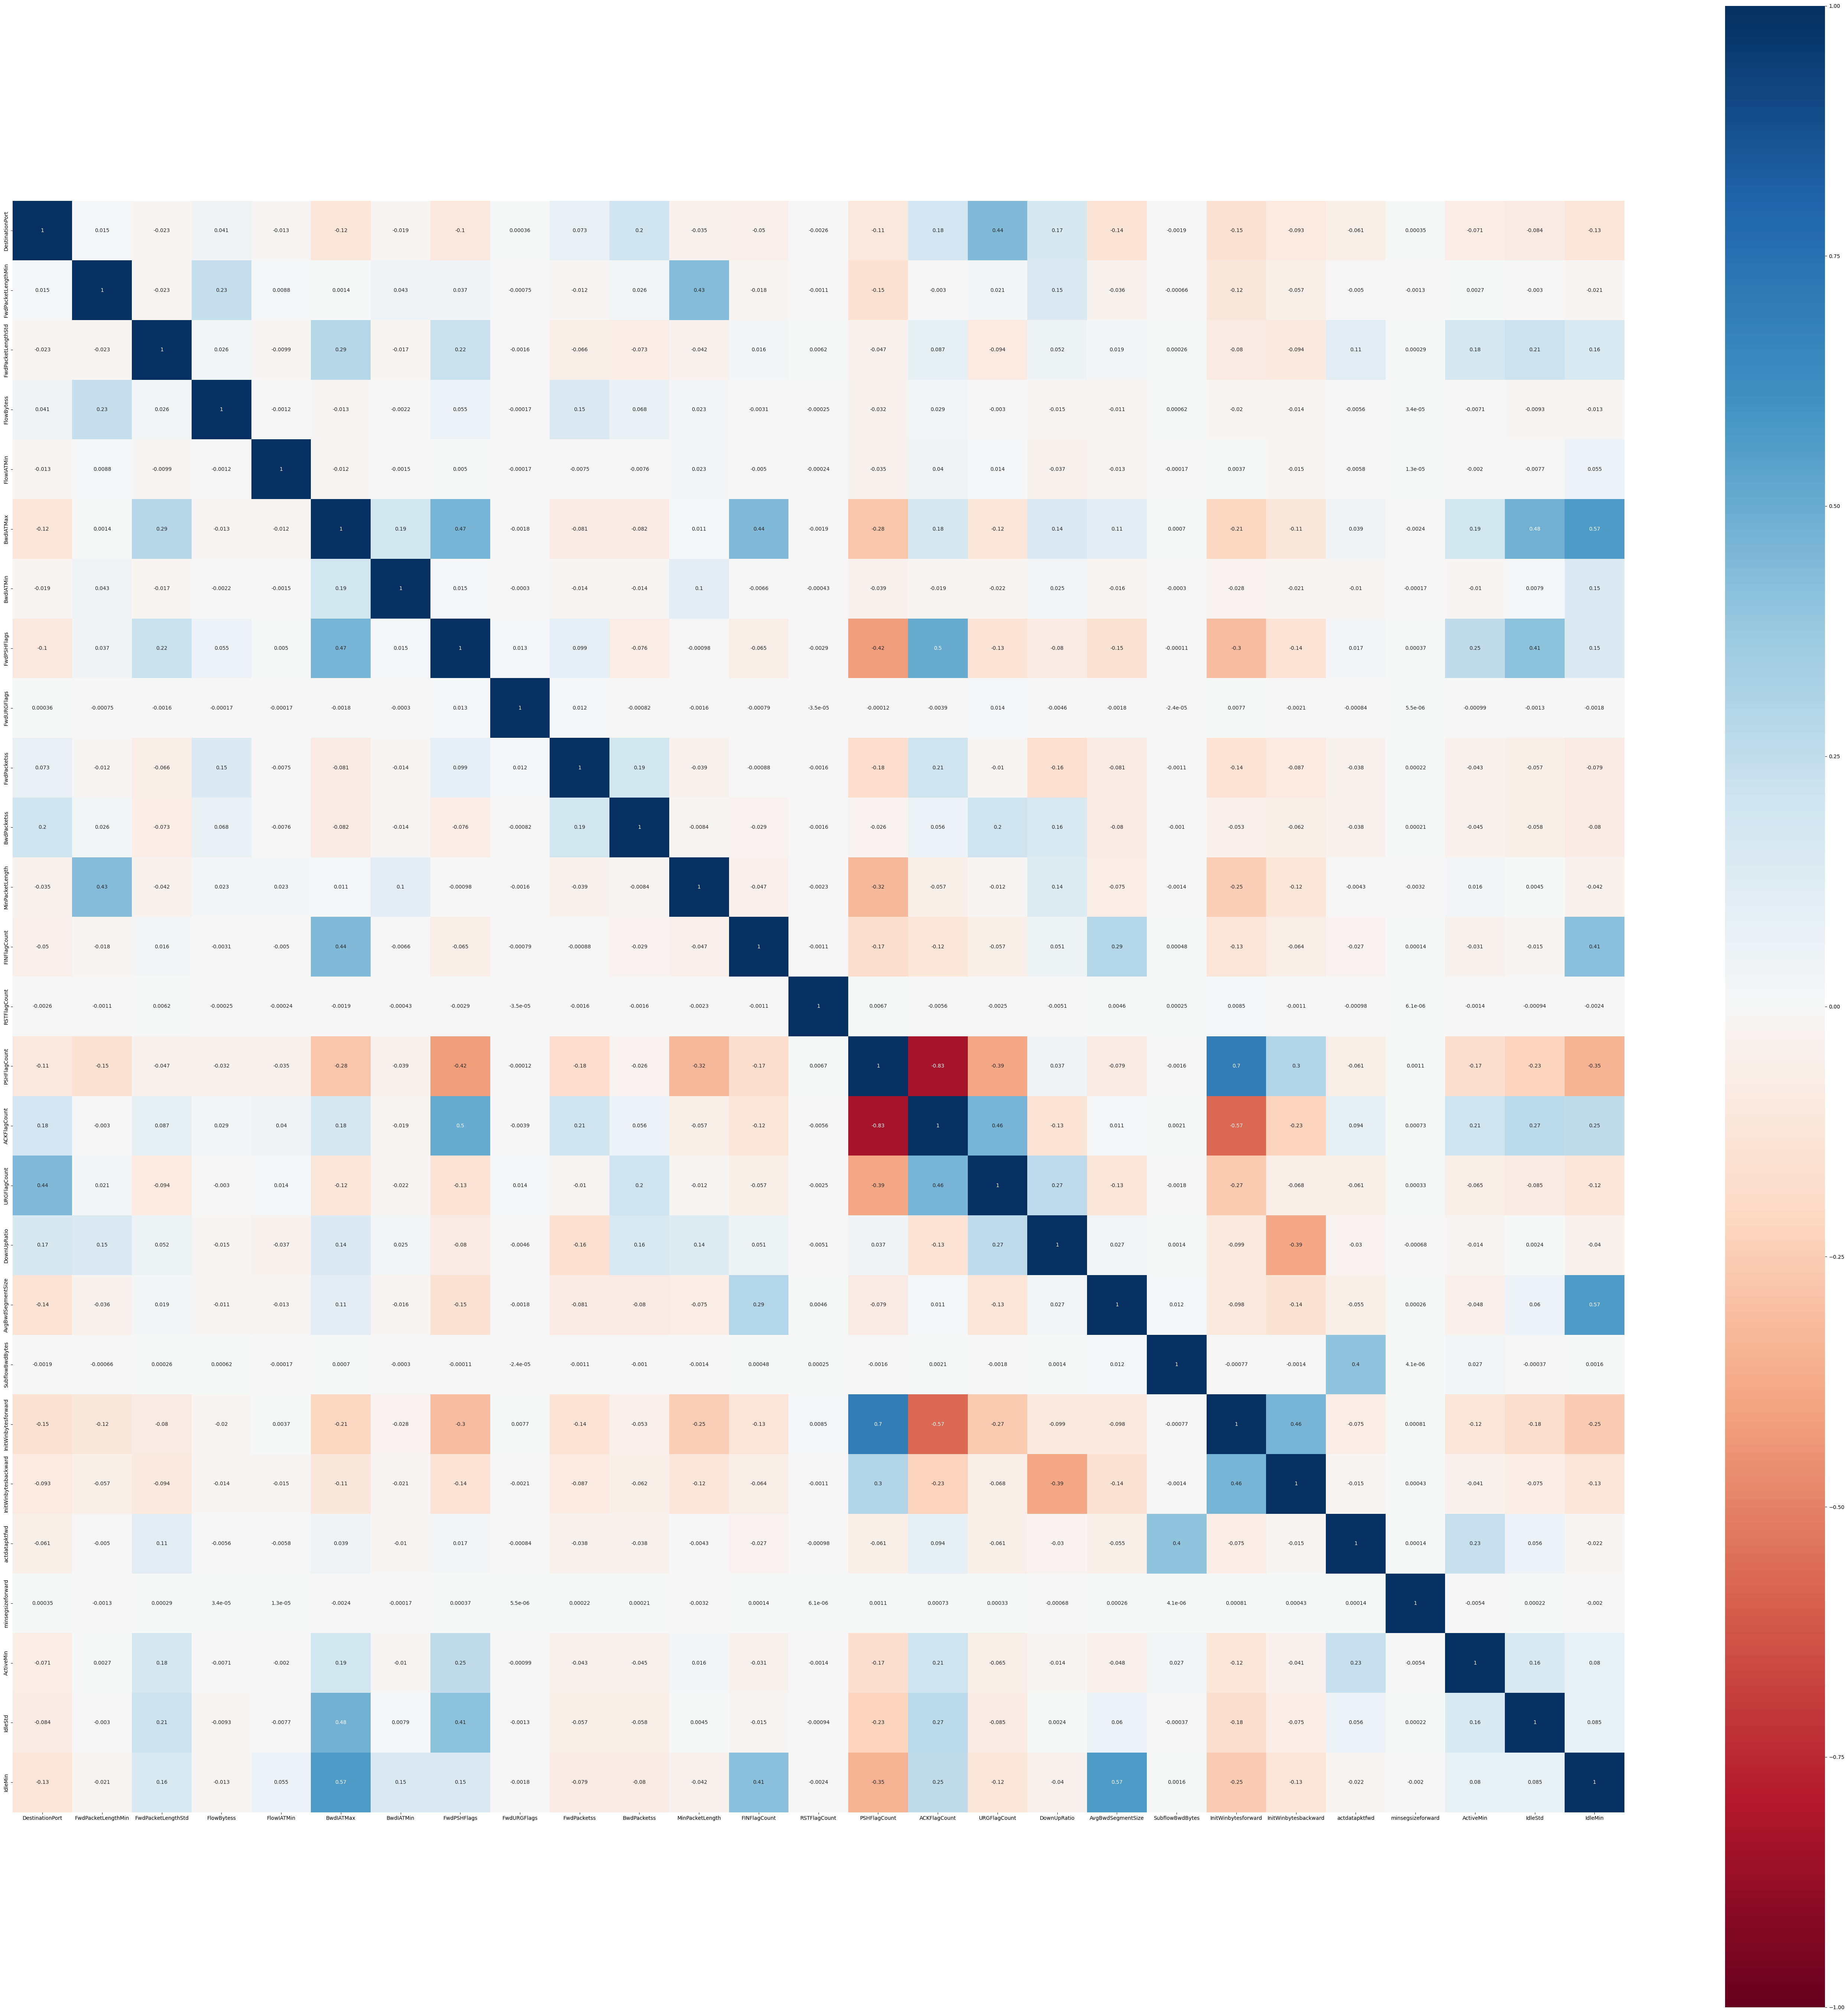

In [48]:
plt.figure(figsize=(70, 70))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, square=True) # annot=True
plt.show()

In [50]:
df.Label.value_counts()

Bot             158804
WebAttack       158804
Infiltration    158804
BruteForce      158804
PortScan        158804
BENIGN          158804
DoS             158804
Name: Label, dtype: int64

In [ ]:
df.to_csv('cic_preprocessed.csv', index=False)

In [ ]:
df = pd.read_csv('cic_preprocessed.csv')

In [ ]:
df.shape

In [ ]:
df.info()

In [53]:
numeric_columns = ['DestinationPort', 'FwdPacketLengthMin', 'FwdPacketLengthStd',
       'FlowBytess', 'FlowIATMin', 'BwdIATMax', 'BwdIATMin',
       'FwdPSHFlags', 'FwdPacketss', 'BwdPacketss', 'MinPacketLength',
       'FINFlagCount', 'RSTFlagCount', 'PSHFlagCount', 'ACKFlagCount',
       'URGFlagCount', 'DownUpRatio', 'AvgBwdSegmentSize',
       'InitWinbytesforward', 'InitWinbytesbackward', 'actdatapktfwd',
       'minsegsizeforward', 'ActiveMin', 'IdleStd', 'IdleMin']

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

rbst = RobustScaler()
df[numeric_columns] = rbst.fit_transform(df[numeric_columns])

In [60]:
df.Label.value_counts()

Bot             158804
WebAttack       158804
Infiltration    158804
BruteForce      158804
PortScan        158804
BENIGN          158804
DoS             158804
Name: Label, dtype: int64

In [55]:
df.head()

,DestinationPort,FwdPacketLengthMin,FwdPacketLengthStd,FlowBytess,FlowIATMin,BwdIATMax,BwdIATMin,FwdPSHFlags,FwdURGFlags,FwdPacketss,...,AvgBwdSegmentSize,SubflowBwdBytes,InitWinbytesforward,InitWinbytesbackward,actdatapktfwd,minsegsizeforward,ActiveMin,IdleStd,IdleMin,Label
0,2.999625,0.0,0.917699,-0.004325,0.081400,6.376963,11.659302,0.0,0.0,-0.001447,...,0.502488,256.0,0.958922,-0.113826,0.25,0.333333,50911.0,34941.27201,10100000.0,Bot
1,2.999625,0.0,0.000000,-0.004425,650.856475,0.000000,0.000000,0.0,0.0,-0.000231,...,-0.134328,0.0,-0.041700,-0.113826,0.00,0.333333,0.0,0.00000,0.0,Bot
2,2.999625,0.0,0.812609,0.021810,0.936439,0.081181,30.383739,0.0,0.0,0.000649,...,0.865672,134.0,0.233132,0.001821,0.75,-0.666667,0.0,0.00000,0.0,Bot
3,0.660292,1.0,0.000000,1.481592,0.497669,0.000000,0.000000,0.0,0.0,0.843814,...,0.000000,6.0,-0.041700,0.019123,0.00,-0.666667,0.0,0.00000,0.0,Bot
4,2.999625,0.0,0.812609,0.023253,0.396414,0.076948,31.134180,0.0,0.0,0.000765,...,0.865672,134.0,0.233132,0.001821,0.75,-0.666667,0.0,0.00000,0.0,Bot


In [68]:
df_sample = df.groupby("Label", group_keys=False).apply(lambda x:x.sample(frac=0.2))

In [69]:
df_sample.Label.value_counts()

BENIGN          31761
Bot             31761
BruteForce      31761
DoS             31761
Infiltration    31761
PortScan        31761
WebAttack       31761
Name: Label, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_sample.drop("Label", axis=1), df_sample['Label'], test_size=0.3)

In [73]:
import time
import warnings
warnings.filterwarnings("ignore")

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

models = []
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('SVM', SVC(gamma='auto')))
models.append(('Decision Tree', DecisionTreeClassifier(max_depth=5)))
models.append(('RF', RandomForestClassifier(max_depth=5, n_estimators=5, max_features=3)))
#models.append(('ABoost', AdaBoostClassifier()))
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=200)))
models.append(('NB', GaussianNB()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
#models.append(('MLP', MLPClassifier()))

print('Model\tAcc\tPr\tRecall\tF1\tExecution')

for name, model in models:
    start_time = time.time()
    kfold = model_selection.KFold(n_splits=5, random_state=24, shuffle = True)

    accuracy = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy').mean()
    precision = cross_val_score(model, x_train, y_train, cv=kfold, scoring='precision').mean()
    recall = cross_val_score(model, x_train, y_train, cv=kfold, scoring='recall').mean()
    f1_score = cross_val_score(model, df.drop("Label", axis=1), df["Label"], cv=kfold, scoring='f1_weighted').mean()

    delta = time.time() - start_time
    print('{}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.2f} secs'.format(name, accuracy, precision, recall, f1_score, delta))

Model	Acc	Pr	Recall	F1	Execution
Decision Tree	0.940	nan	nan	0.939	53.48 secs
RF	0.925	nan	nan	0.923	38.96 secs
LR	0.257	nan	nan	0.253	512.77 secs
NB	0.317	nan	nan	0.230	24.48 secs
LDA	0.817	nan	nan	0.810	55.52 secs
QDA	0.911	nan	nan	0.817	34.10 secs


In [74]:
from sklearn.naive_bayes import BernoulliNB

#MODEL FIT
# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(x_train, y_train);

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(x_train, y_train);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(x_train, y_train)

BernoulliNB()

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score

models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
#models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores = cross_val_score(v, x_train, y_train, cv=10)
    accuracy = metrics.accuracy_score(y_train, v.predict(x_train))
    confusion_matrix = metrics.confusion_matrix(y_train, v.predict(x_train))
    classification = metrics.classification_report(y_train, v.predict(x_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification)
    print()


============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.8826946130367647

Model Accuracy:
 0.882444033207392

Confusion matrix:
 [[17770  1585   421  1316   672   109   395]
 [   33 22142     0     0     0     0     0]
 [   20     0 22149     0     0     0     0]
 [ 3217     0  4293 14633     0     0   108]
 [  852  1513     0     0 19863     0     0]
 [   96    26    13    11     0 22007    62]
 [    0     0  3553     0     0     0 18769]]

Classification report:
               precision    recall  f1-score   support

      BENIGN       0.81      0.80      0.80     22268
         Bot       0.88      1.00      0.93     22175
  BruteForce       0.73      1.00      0.84     22169
         DoS       0.92      0.66      0.77     22251
Infiltration       0.97      0.89      0.93     22228
    PortScan       1.00      0.99      0.99     22215
   WebAttack       0.97      0.84      0.90     22322

    accuracy     

In [76]:
#MODEL PERFORMANCE ON TEST DATA
for i, v in models:
    accuracy = metrics.accuracy_score(y_test, v.predict(x_test))
    confusion_matrix = metrics.confusion_matrix(y_test, v.predict(x_test))
    classification = metrics.classification_report(y_test, v.predict(x_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification)
    print()


============================== Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.8798182881302569

Confusion matrix:
 [[7579  685  199  513  291   54  172]
 [  23 9563    0    0    0    0    0]
 [   7    0 9585    0    0    0    0]
 [1463    0 1831 6168    0    0   48]
 [ 351  689    0    0 8493    0    0]
 [  44    6    8    3    0 9459   26]
 [   0    0 1603    0    0    0 7836]]

Classification report:
               precision    recall  f1-score   support

      BENIGN       0.80      0.80      0.80      9493
         Bot       0.87      1.00      0.93      9586
  BruteForce       0.72      1.00      0.84      9592
         DoS       0.92      0.65      0.76      9510
Infiltration       0.97      0.89      0.93      9533
    PortScan       0.99      0.99      0.99      9546
   WebAttack       0.97      0.83      0.89      9439

    accuracy                           0.88     66699
   macro avg       0.89      0.88      0.88     66699
weigh

In [77]:
#CALCULATING THE PERCENTAGE OF INCORRENT PREDICTIONS OF THE MODELS
from sklearn.metrics import hamming_loss

for i, v in models:
    y_pred = v.predict(x_test)
    h_loss = hamming_loss(y_test, y_pred)

    print()
    print('============================== {} Percentage of INCORRECT Predictions =============================='.format(i))
    print()
    print ("Hamming Loss:" ,h_loss*100)
    print()


============================== Naive Baye Classifier Percentage of INCORRECT Predictions ==============================

Hamming Loss: 12.018171186974318


============================== LogisticRegression Percentage of INCORRECT Predictions ==============================

Hamming Loss: 76.90819952323123



In [78]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=17, max_features=10, min_samples_leaf=3, n_estimators=50, random_state=42, oob_score=True)
# rfc = RandomForestClassifier(n_estimators=250, random_state=1)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=17, max_features=10, min_samples_leaf=3,
                       n_estimators=50, oob_score=True, random_state=42)

In [79]:
features = x_train.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

for index, i in enumerate(indices[:10]):
    print('{}.\t#{}\t{:.3f}\t{}'.format(index + 1, i, importances[i], features[i]))

1.	#0	0.282	DestinationPort
2.	#21	0.155	InitWinbytesbackward
3.	#10	0.059	BwdPacketss
4.	#18	0.054	AvgBwdSegmentSize
5.	#20	0.053	InitWinbytesforward
6.	#24	0.052	ActiveMin
7.	#19	0.039	SubflowBwdBytes
8.	#23	0.038	minsegsizeforward
9.	#3	0.035	FlowBytess
10.	#2	0.032	FwdPacketLengthStd


In [84]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

y_pred = rfc.predict(x_test)
confusion_matrix(y_test, y_pred)
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average = 'macro')
recall = metrics.recall_score(y_test, y_pred, average = 'macro')
f1 = metrics.f1_score(y_test, y_pred, average = 'macro')
print('Accuracy =', accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 =', f1)

Accuracy = 0.9982758362194336
Precision = 0.9982838874528402
Recall = 0.9982698037143788
F1 = 0.9982718721354203


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
ids18 = pd.read_csv('03-02-2018.csv')

In [ ]:
ids18.Label.value_counts()

In [ ]:
ids18.head()

In [ ]:
df_bot = ids18[ids18['Label']=='Bot'].groupby("Label", group_keys=False).apply(lambda x:x.sample(frac=0.2))

In [ ]:
df_bot.Label.value_counts()

In [ ]:
df_bot.drop(['Timestamp'], axis=1)


In [ ]:
df_bot.columns = df_bot.columns.str.replace(' ', '')
df_bot = df_bot[df.columns]
y_pred = rfc.predict(df_bot.drop("Label", axis=1))
confusion_matrix(df["Label"], y_pred)
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
print('Accuracy =', accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 =', f1)